<a href="https://colab.research.google.com/github/Bhuvanesh2303/Bhuvanesh2303/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset saved successfully.
Preview of Dataset (showing 300 rows):


,Student_ID,CGPA,Attendance,Projects,Hackathons,Clubs,Final_Score
0,S001,7.496714,71.710050,5,1,1,76.936585
1,S002,6.861736,74.398190,2,1,3,71.618350
2,S003,7.647689,87.472936,5,1,3,84.136829
3,S004,8.523030,86.103703,3,2,1,79.708023
4,S005,6.765847,79.790984,6,0,3,79.379755
...,...,...,...,...,...,...,...
295,S296,6.307090,74.899836,6,1,3,87.729199
296,S297,7.899600,77.301251,3,1,1,65.240221
297,S298,7.307300,70.212363,4,3,3,97.511666
298,S299,7.812862,75.557067,2,1,1,58.969040


Visualizing data for 300 students: S001 to S300


/tmp/ipython-input-1118793201.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_subset[feature], palette="Set2")


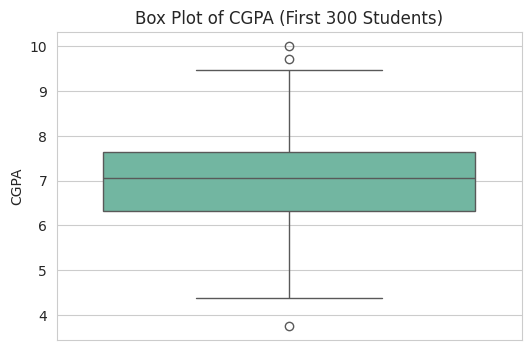

/tmp/ipython-input-1118793201.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_subset[feature], palette="Set2")


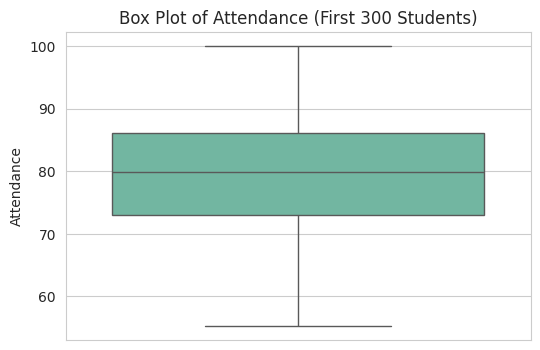

/tmp/ipython-input-1118793201.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_subset[feature], palette="Set2")


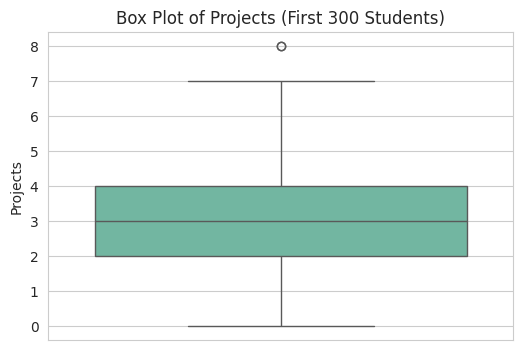

/tmp/ipython-input-1118793201.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_subset[feature], palette="Set2")


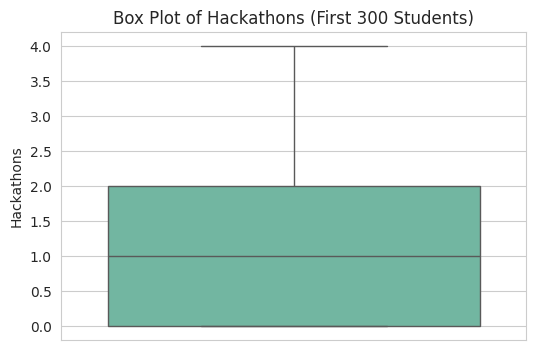

/tmp/ipython-input-1118793201.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_subset[feature], palette="Set2")


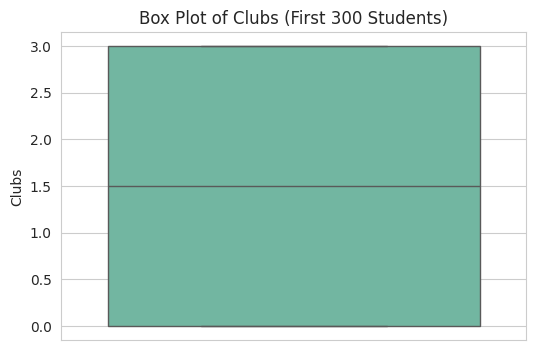

/tmp/ipython-input-1118793201.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_subset[feature], palette="Set2")


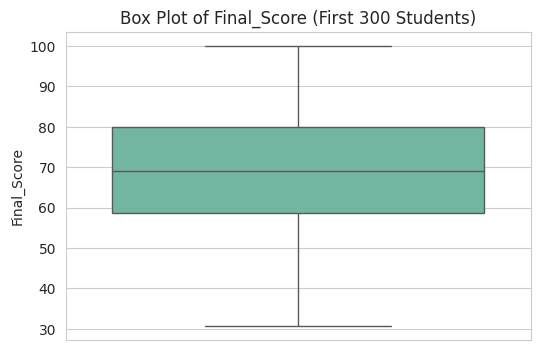

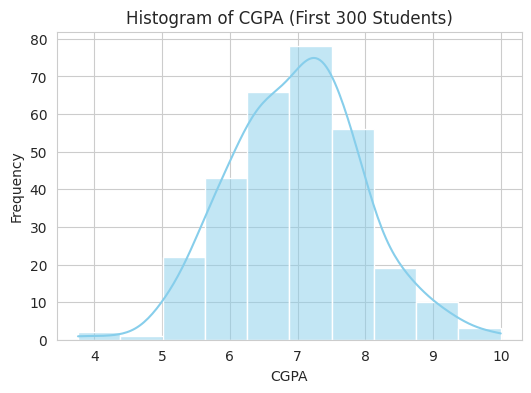

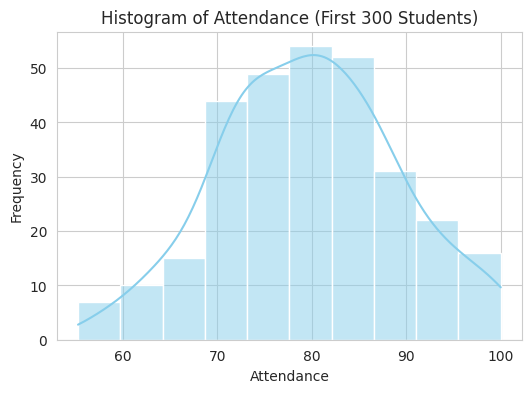

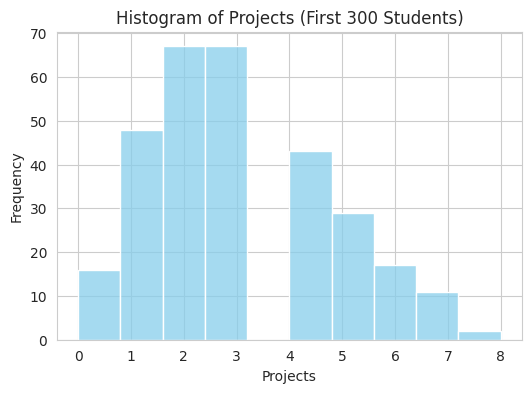

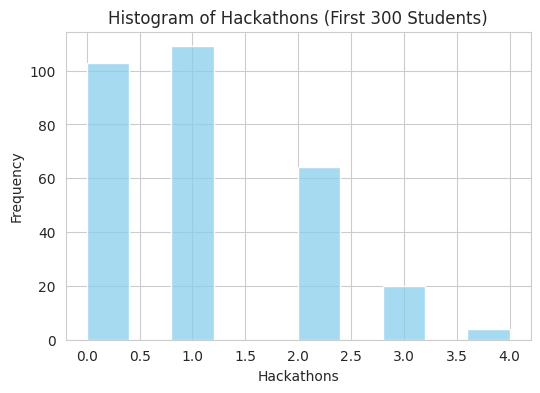

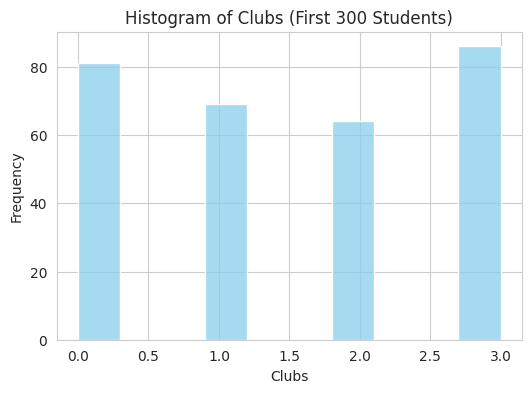

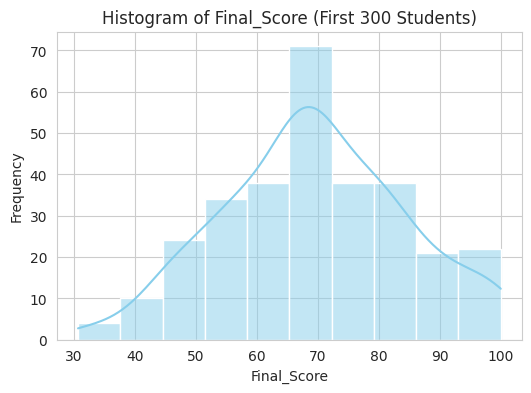

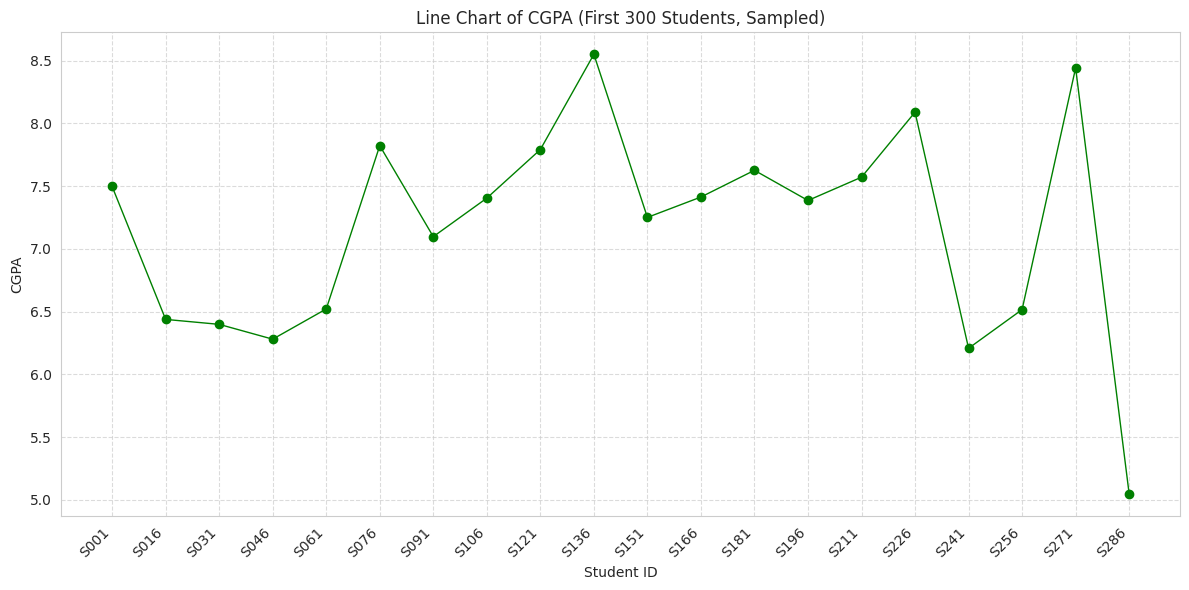

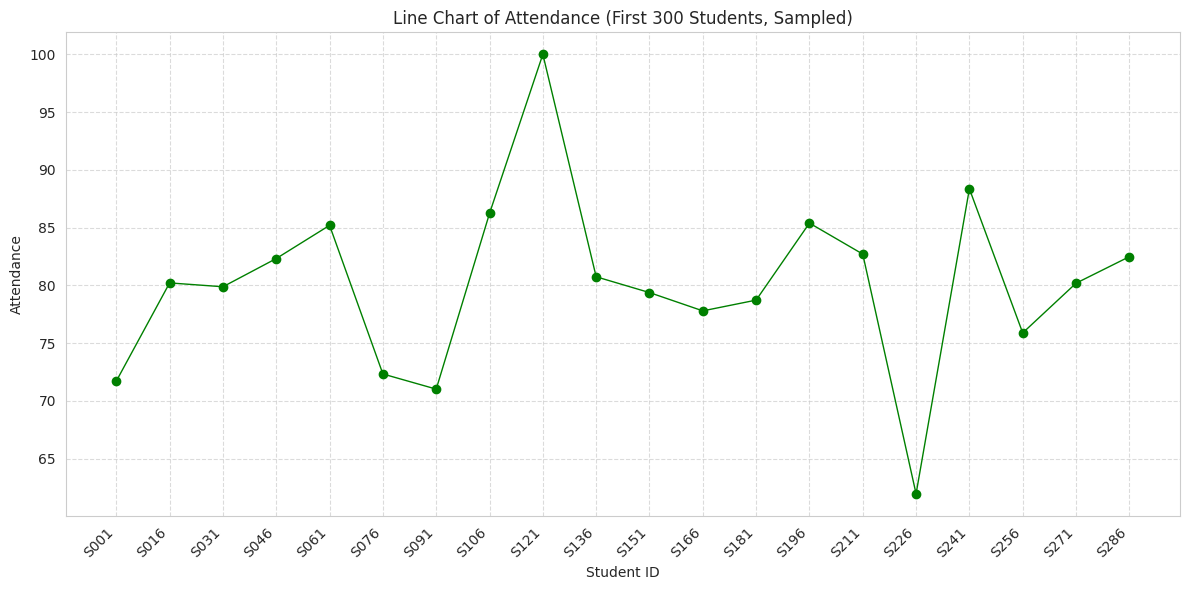

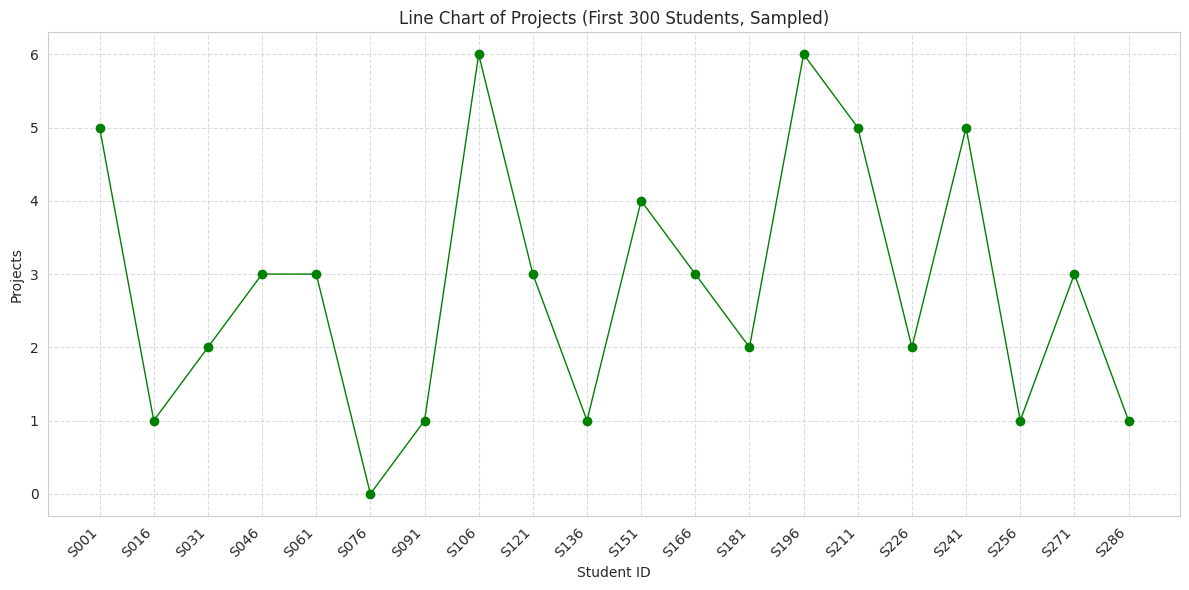

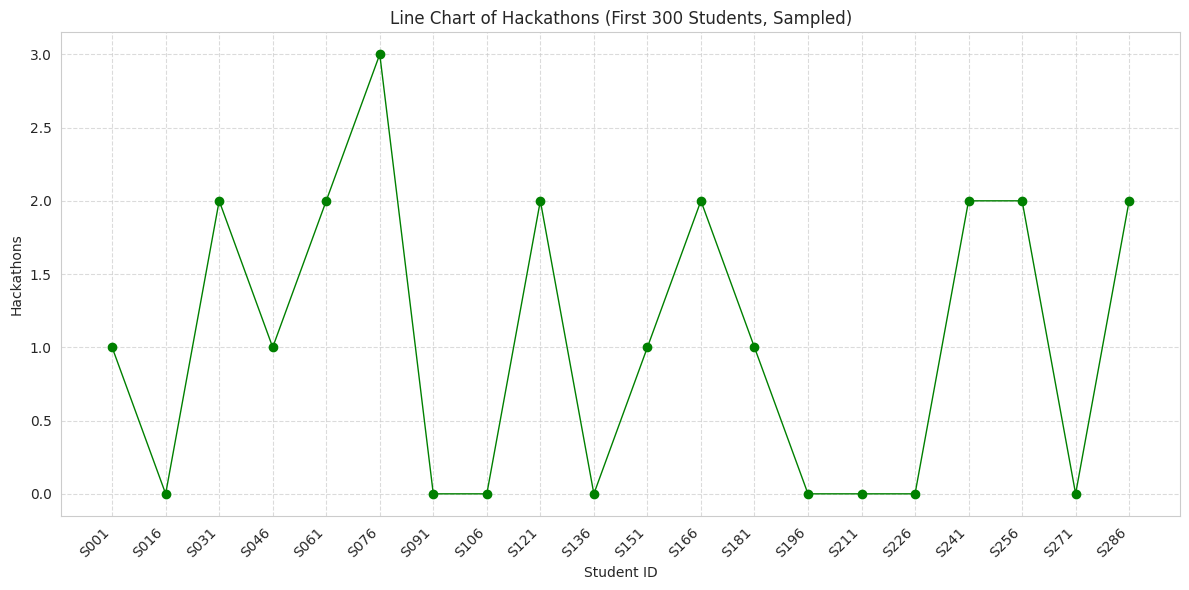

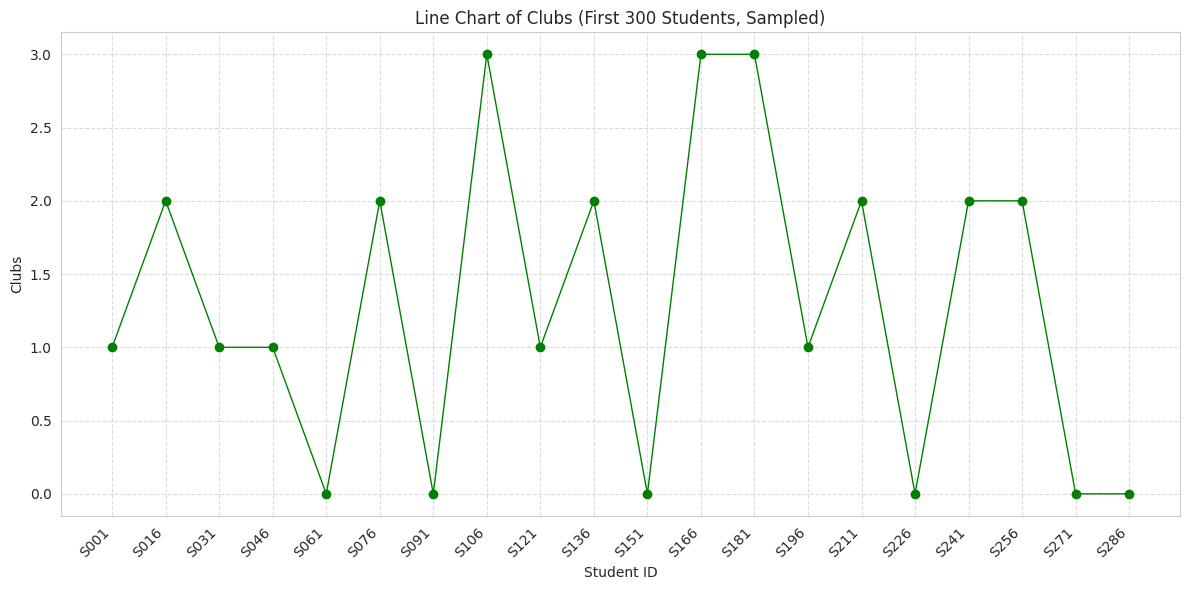

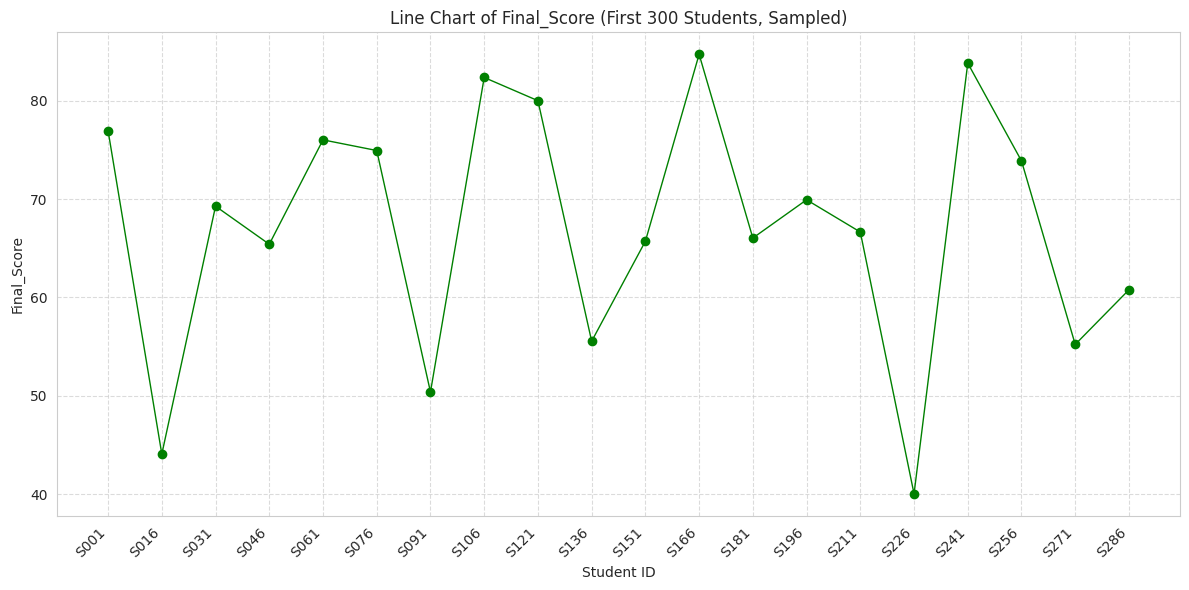

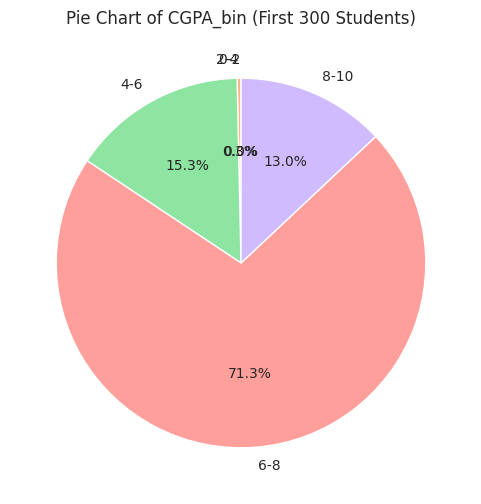

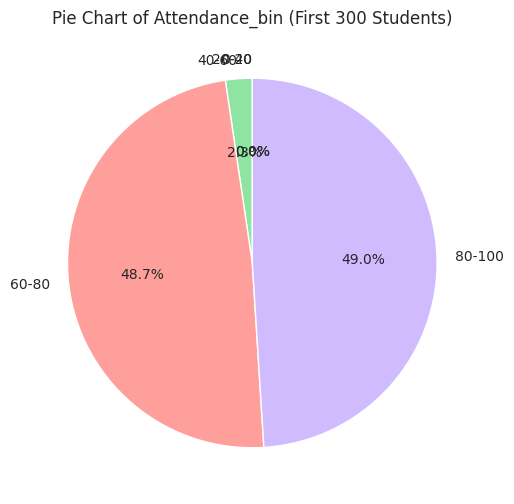

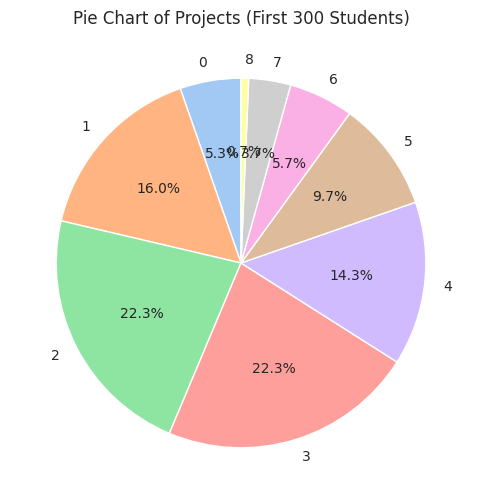

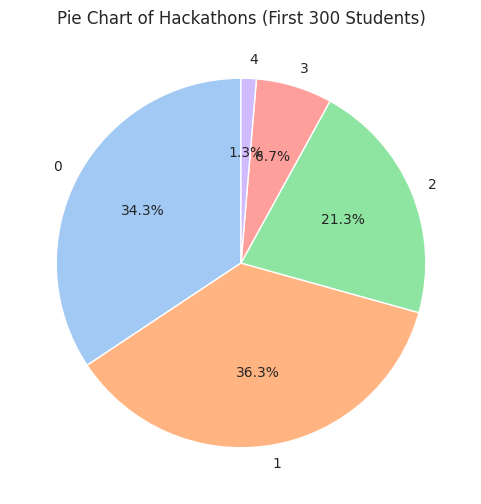

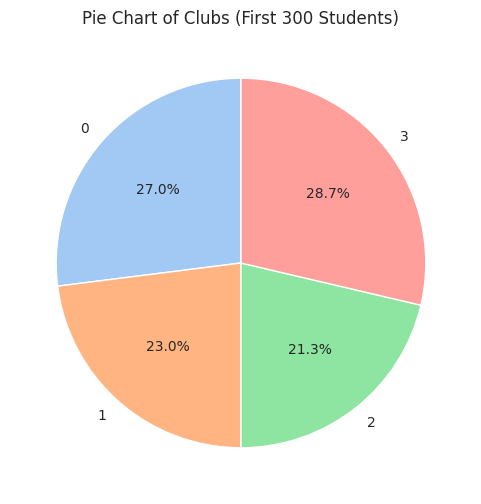

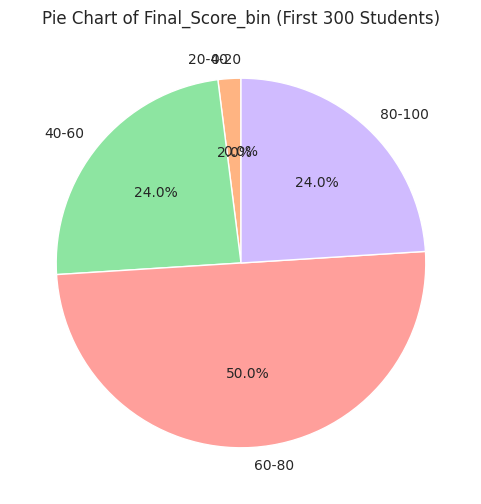

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
num_students = 300
cgpa = np.clip(np.random.normal(7.0, 1.0, num_students), 0, 10)
attendance = np.clip(np.random.normal(80, 10, num_students), 0, 100)
projects = np.random.poisson(3, num_students)
hackathons = np.random.poisson(1, num_students)
clubs = np.random.randint(0, 4, num_students)
noise = np.random.normal(0, 5, num_students)

# Calculate Final_Score
final_score = (
    0.3 * cgpa * 10 +
    0.2 * attendance +
    5 * projects +
    10 * hackathons +
    5 * clubs +
    noise
)
final_score = np.clip(final_score, 0, 100)

# Create DataFrame
df = pd.DataFrame({
    'Student_ID': [f"S{str(i+1).zfill(3)}" for i in range(num_students)],
    'CGPA': cgpa,
    'Attendance': attendance,
    'Projects': projects,
    'Hackathons': hackathons,
    'Clubs': clubs,
    'Final_Score': final_score
})

# Save dataset to CSV
try:
    df.to_csv('student_performance.csv', index=False)
    print("Dataset saved successfully.")
except Exception as e:
    print(f"Error saving dataset: {e}")

# Parameter to control number of rows to display in table
num_rows_to_display = 300  # Change this to display desired number of rows

# Display preview of dataset
print(f"Preview of Dataset (showing {num_rows_to_display} rows):")
display(df.head(num_rows_to_display))

# Parameter to specify number of students for visualizations
num_students_to_visualize = 300  # Change this to visualize a different number of students
student_ids = [f"S{str(i+1).zfill(3)}" for i in range(num_students_to_visualize)]  # First 100 students: S001 to S100

# Filter DataFrame for selected students
try:
    df_subset = df[df['Student_ID'].isin(student_ids)].copy()
    if len(df_subset) != num_students_to_visualize:
        raise ValueError(f"Expected {num_students_to_visualize} students, but found {len(df_subset)} matching Student_IDs.")
    print(f"Visualizing data for {num_students_to_visualize} students: {student_ids[0]} to {student_ids[-1]}")
except ValueError as e:
    print(f"Error: {e}")
    df_subset = df  # Fallback to full dataset if error occurs

# Define features to visualize
features = ['CGPA', 'Attendance', 'Projects', 'Hackathons', 'Clubs', 'Final_Score']

# Bin continuous features for pie charts
df_subset['CGPA_bin'] = pd.cut(df_subset['CGPA'], bins=[0, 2, 4, 6, 8, 10], labels=['0-2', '2-4', '4-6', '6-8', '8-10'])
df_subset['Attendance_bin'] = pd.cut(df_subset['Attendance'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])
df_subset['Final_Score_bin'] = pd.cut(df_subset['Final_Score'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

# Box Plots for each feature
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df_subset[feature], palette="Set2")
    plt.title(f"Box Plot of {feature} (First {num_students_to_visualize} Students)")
    plt.ylabel(feature)
    plt.show()

# Histograms for each feature
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df_subset[feature], kde=(feature in ['CGPA', 'Attendance', 'Final_Score']), bins=10, color="skyblue")
    plt.title(f"Histogram of {feature} (First {num_students_to_visualize} Students)")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Line Charts for each feature (first 100 students, optimized)
for feature in features:
    plt.figure(figsize=(12,6))
    # Use every 5th student to reduce clutter
    step_size = max(1, num_students_to_visualize // 20)  # Adjust step to show ~20 points
    indices = range(0, num_students_to_visualize, step_size)
    plt.plot(df_subset['Student_ID'][indices], df_subset[feature][indices], marker='o', linestyle='-', color="green", markersize=6, linewidth=1)
    plt.title(f"Line Chart of {feature} (First {num_students_to_visualize} Students, Sampled)")
    plt.xlabel("Student ID")
    plt.ylabel(feature)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Pie Charts for categorical or binned features
pie_features = ['CGPA_bin', 'Attendance_bin', 'Projects', 'Hackathons', 'Clubs', 'Final_Score_bin']
for feature in pie_features:
    plt.figure(figsize=(6,6))
    counts = df_subset[feature].value_counts().sort_index()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title(f"Pie Chart of {feature} (First {num_students_to_visualize} Students)")
    plt.show()